In [146]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt


In [147]:
# Constants
h_m = 29 * 1e-3
h_o = 14.5 * 1e-3
h_f = 14 * 1e-3
d = 0.3 * 1e-3
L = 834 * 1e-3
rho = 7800


def circle_area(diameter): return (np.pi*(diameter**2))/4


mu = rho*(circle_area(d))


## Question 1

- The speaking length is calculated by using pythagoras theorem
  $$l_{s_{i}} = \sqrt{{l_{f_{i}}}^2 + (h_{m}-h_{f})^2}$$
- From Mersenne's law:
  $$ T*{s*{i}} = 4{L^2}{\mu}{f\_{i}}


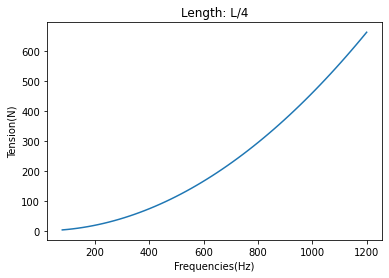

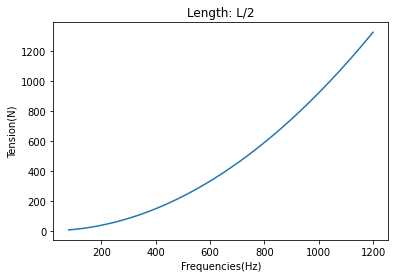

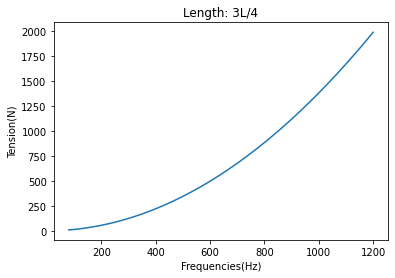

In [148]:
def get_speaking_length(l_f_i, h_m, h_f):
    return np.sqrt(l_f_i + (h_m-h_f)**2)


def get_T_s_i(L, mu, f_i,h_m=h_m,h_f=h_f):
    l_s_i = get_speaking_length(L,h_m,h_f)
    return 4*(l_s_i**2)*mu*f_i**2


# Using range of frequencies from 80Hz to 1200 Hz (from a simple google search)
freqs = np.linspace(80, 1200, 60)  # 60 samples for measurement

# expression is for general l_f_i, for sake of the plot taking l_f_i as L/4,L/2 and 3L/4
lengths = [{"name": "L/4", "value": L/4}, {"name": "L/2",
                                           "value": L/2}, {"name": "3L/4", "value": (3*L)/4}]
T_length_map = {"L/4": [], "L/2": [], "3L/4": []}

for freq in freqs:
    for length in lengths:
        [name, length_value] = length.values()
        T_length_map[name].append(get_T_s_i(length_value, mu, freq))


for length in lengths:
    [name, _] = length.values()
    plt.title(f"Length: {name}")
    plt.xlabel("Frequencies(Hz)")
    plt.ylabel("Tension(N)")
    plt.plot(freqs, T_length_map[name])
    plt.show()


## Question 2

- The string is assumed to be massless, hence the forces should be balanced at the fret when the force is applied
- Resolving the force and the tension in the string into its horizontal and vertical components and balancing the forces
  $$F_x = T_{p_{i}}\cos{{\theta}_{2}} - T_{s_{i}}\cos{{\theta}_{1}}$$
  $$F_y = T_{p_{i}}\sin{{\theta}_{2}} + T_{s_{i}}\sin{{\theta}_1}$$
- Here ${\theta}_{1}$ and ${\theta}_{2}$ are the angles made by Tensions $T_{s_{i}}$ and $T_{p_{i}}$ with the horizontal axis
- The angles can be found by using simple trigonometry, since the dimensions are given
- `Assumption: the tension T_p_i is set to be the tension in the free string`


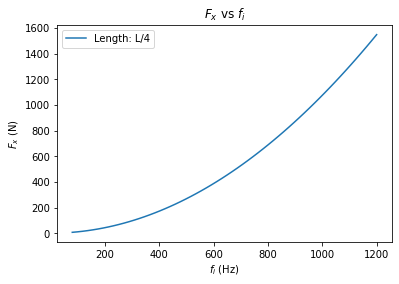

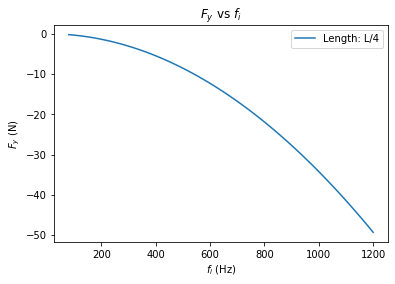

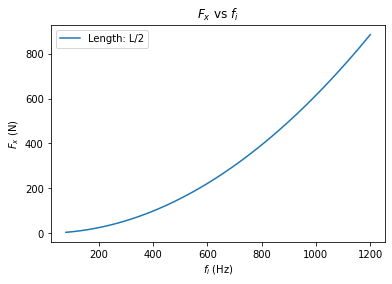

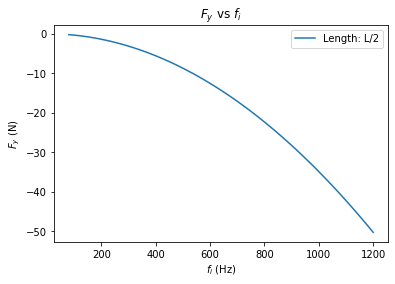

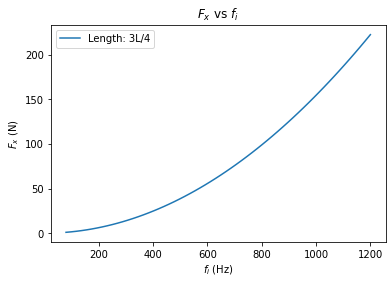

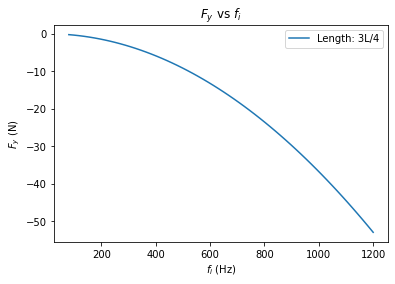

In [149]:
def calculate_theta1(h_m, h_f, l_f_i): return np.arctan((h_m-h_f)/l_f_i)


def calculate_theta2(h_o, h_f, L, l_f_i): return np.arctan((h_o-h_f)/(L-l_f_i))
def calculate_weight(mu, L): return 9.81*mu*L


def calculate_force_vector(l_f_i, f_i, h_m):
    T_s_i = get_T_s_i(l_f_i, mu, f_i)
    theta1 = calculate_theta1(h_m, h_f, l_f_i)
    theta2 = calculate_theta2(h_o, h_f, L, l_f_i)
    T_p_i = 4*(L**2)*mu*(f_i**2)
    F_x = T_p_i*np.cos(theta2) - T_s_i*np.cos(theta1)
    F_y = -T_p_i*np.sin(theta2) - T_s_i*np.sin(theta1) + \
        (calculate_weight(mu, L))
    # should probably go with the 2d shape, but since there are no vector operations this should suffice
    return [F_x, F_y]


F_x_length_map = {"L/4": [], "L/2": [], "3L/4": []}
F_y_length_map = {"L/4": [], "L/2": [], "3L/4": []}
for length in lengths:
    for freq in freqs:
        [name, length_value] = length.values()
        F_x_length_map[name].append(
            calculate_force_vector(length_value, freq, h_m)[0])
        F_y_length_map[name].append(
            calculate_force_vector(length_value, freq, h_m)[1])


for length in lengths:
    [name, _] = length.values()
    plt.title("$F_x$ vs $f_i$")
    plt.plot(freqs, F_x_length_map[name])
    plt.legend([f"Length: {name}"])
    plt.ylabel("$F_x$ (N)")
    plt.xlabel("$f_i$ (Hz)")
    plt.show()
    plt.title("$F_y$ vs $f_i$")
    plt.plot(freqs, F_y_length_map[name])
    plt.legend([f"Length: {name}"])
    plt.ylabel("$F_y$ (N)")
    plt.xlabel("$f_i$ (Hz)")
    plt.show()


#### Magnitude of $F_x$ and $F_y$ increases with frequency

## Question 3

- Plotting forces with respect to hm.
- Forces within the system:
  1.  Tension
  2.  Force of the pluck: $F_{finger} = \sqrt{{F_x}^2+{F_y}^2}$
- Values for $h_m$ is varied from the value of $h_a = 14.5 \text{mm}$, to $40 \text{mm}$


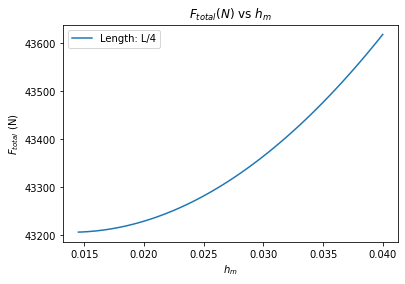

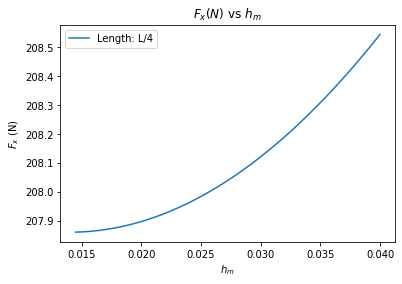

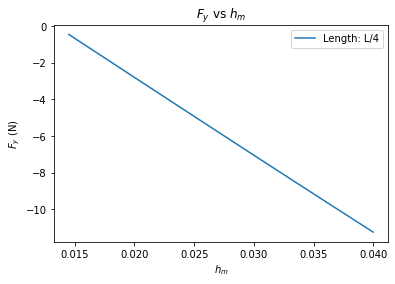

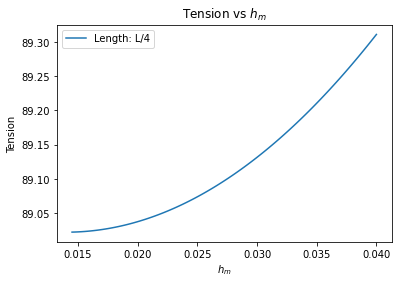

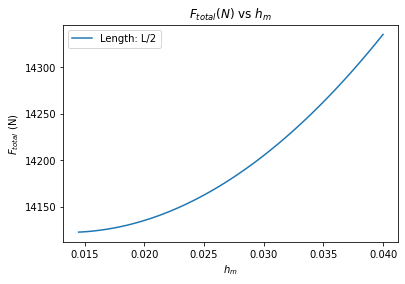

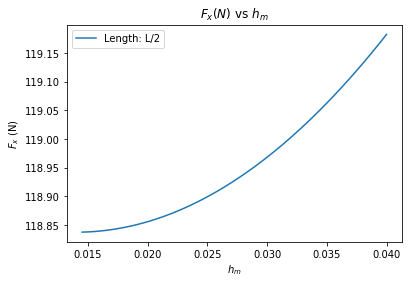

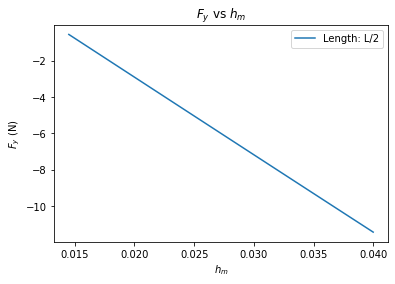

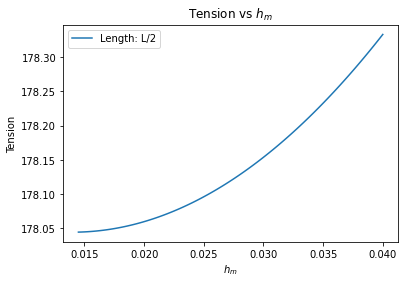

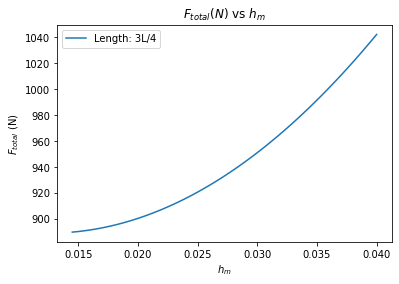

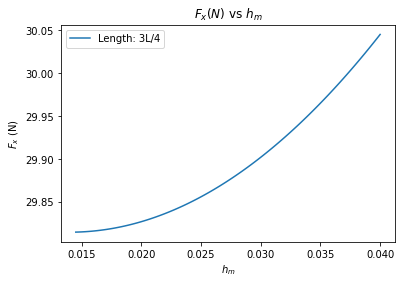

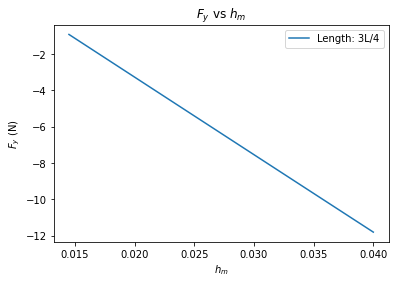

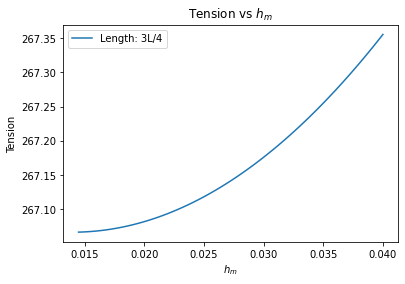

In [154]:
h_m_range = np.linspace(14.5*1e-3, 40*1e-3, 100)
# Choosing frequency of 440Hz(Middle C),130Hz* for plotting the variation of forces v/s h_m
c_freqs = [130,440]


calculate_total_pluck_force = lambda F_x,F_y: F_x**2 + F_y**2

F_total = {"L/4": [], "L/2": [], "3L/4": []}
F_x_hm = {"L/4": [], "L/2": [], "3L/4": []}
F_y_hm = {"L/4": [], "L/2": [], "3L/4": []}
T_s_i_hm = {"L/4": [], "L/2": [], "3L/4": []}


for length in lengths:
    for h_m in h_m_range:
        [name, length_value] = length.values()
        [F_x,F_y] = calculate_force_vector(length_value, 440, h_m)
        F_total[name].append(calculate_total_pluck_force(F_x,F_y))


for length in lengths:
    for h_m in h_m_range:
        [name, length_value] = length.values()
        [F_x,F_y] = calculate_force_vector(length_value, 440, h_m)
        F_x_hm[name].append(F_x)
        F_y_hm[name].append(F_y)


for length in lengths:
    for h_m in h_m_range:
        [name, length_value] = length.values()
        T_s_i_hm[name].append(get_T_s_i(length_value,mu,440,h_m))

for length in lengths:
    [name, _] = length.values()
    plt.title("$F_{total} (N)$ vs $h_m$")
    plt.plot(h_m_range, F_total[name])
    plt.ylabel("$F_{total}$ (N)")
    plt.xlabel("$h_m$")
    plt.legend([f"Length: {name}"])
    plt.show()
    plt.title("$F_x (N)$ vs $h_m$")
    plt.plot(h_m_range, F_x_hm[name])
    plt.ylabel("$F_x$ (N)")
    plt.xlabel("$h_m$")
    plt.legend([f"Length: {name}"])
    plt.show()
    plt.title(f"$F_y$ vs $h_m$")
    plt.plot(h_m_range, F_y_hm[name])
    plt.ylabel("$F_y$ (N)")
    plt.xlabel("$h_m$")
    plt.legend([f"Length: {name}"])
    plt.show()
    plt.title("Tension vs $h_m$")
    plt.plot(h_m_range, T_s_i_hm[name])
    plt.ylabel("Tension")
    plt.xlabel("$h_m$")
    plt.legend([f"Length: {name}"])
    plt.show()

#### Magnitude of the forces $F_x$, $F_y$, $F_{total}$ and Tension increase with an increase in $h_m$

## Question 4
- Calculation of the location of the fret
- Modus operandi here is to find the length corresponding to the given frequency.
- Relationship between free standing length of the bridge to fret and the frequency is to be obtained
- To identify this from the sitar, we take the experimental data and plot it and try to find a curve fit
- Method is not extremely reliable since the data set is too small

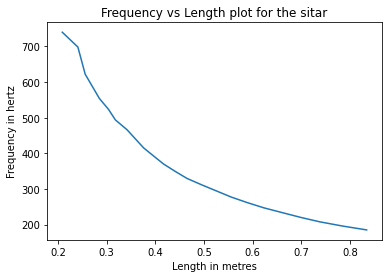

In [151]:
l_f_i_array = []
freq_array = []

flatten = lambda nestedlist: [element for sublist in nestedlist for element in sublist] 

with open("./data.txt") as sitar_data:
	while line := sitar_data.readline():
		l_f_i,freq = [float(x) for x in line.strip('\n').split(' ')]
		l_f_i_array.append(l_f_i)
		freq_array.append(freq)
plt.title("Frequency vs Length plot for the sitar")
plt.xlabel("Length in metres")
plt.ylabel("Frequency in hertz")
plt.plot(l_f_i_array,freq_array)
plt.show()

- ```The above plot is a smooth curve and thus a Taylor polynomial approximation can be made for fitting the data```
- Using terms upto the first 10 powers of x

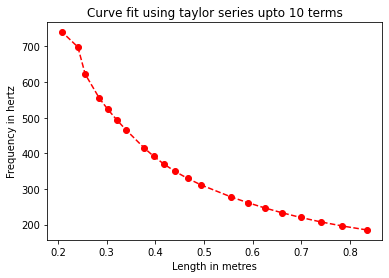

For suddh Re, l_f_i(distance from master bridge to the fret) is 0.2695520967621139


In [155]:
poly_utils = np.polynomial.polynomial

coeff,_ = poly_utils.polyfit(freq_array,l_f_i_array,10,full=True)


fitted_values = poly_utils.polyval(freq_array,coeff)

plt.plot(fitted_values,freq_array,'ro--')
plt.title("Curve fit using taylor series upto 10 terms")
plt.xlabel("Length in metres")
plt.ylabel("Frequency in hertz")
plt.show()

# for sudh Re of frequency 587.32
length_prediction = poly_utils.polyval(587.2,coeff)
print(f"For suddh Re, l_f_i(distance from master bridge to the fret) is {length_prediction}")

### The length from the master bridge to the fret of suddh Re is approximately 0.269 m = 269.55 mm

## Question 5

### Existence of high bridges in instruments like Sitar as compared to guitar is because:
1. When action is higher, the force exerted by the player should be high and this can cause discomfort in playing
2. The ideal bridge height creates sufficient angularity in the string to create enough down force to drive the top, but places the strings sufficiently close to the fingerboard to make noting the strings easy 
3. Bridges are designed to hold the strings at a suitable height above the fingerboard of the instrument.

### Appropriate height of main bridge depends on the following factors:
1. Action: the action of the instrument should not be too low(less angularity in the string leading to less precision for the player) and high angularity(which leads to the player having to use excessive force)
2. Material properties of the string like its thickness: thicker strings require the player to have a higher bridge since flat and thick strings can lead to poor precision for the musician to place his/her finger  

#### Sitar is designed by considering the tradeoff between precision of playing the note vs the extra force the musician has to apply because of high action. This is in contrast to instruments like the guitar which has a significanly lower action. Also the posture of the artist whilst playing a guitar and a sitar also facilitates the higher force the musiccian has to apply to generate the sound     